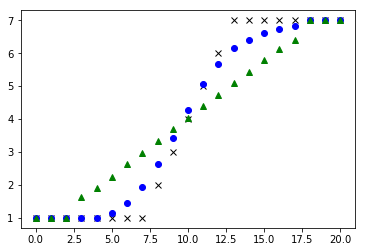

In [2]:
# Smoothing Test
import numpy as np
import matplotlib.pyplot as plt


y = np.ones(7)
y = np.append(y, np.arange(1,8))
y = np.append(y, np.ones(7)*7)

def rect(x):
    
    x = np.copy(x)
    s = 3
    for i in range(len(x)):
        if i < s:
            continue
        if i > (len(x)-1-s):
            continue
        avg = x[i]
        for j in range(1,s+1):
            avg += x[i+j]
            avg += x[i-j]
            
        x[i] = avg/(s*2+1)
        
    return x

plt.plot(y,'kx')
y_new = rect(y)
plt.plot(y_new, 'bo')

for i in range(20):
    y_new = rect(y_new)

plt.plot(y_new, 'g^')
plt.show()

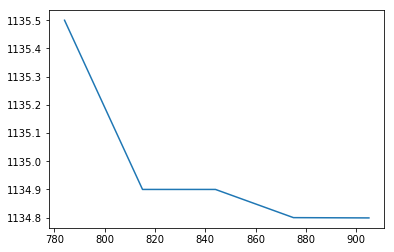

In [4]:
x = np.array([784, 815, 844, 875, 905])
y = np.array([1135.5, 1134.9, 1134.9, 1134.8, 1134.799])


plt.plot(x,y)
plt.show()


In [80]:
# convert spreadsheet.
import pandas as pd
df = pd.read_csv('data/highway_map.csv', delimiter = ' ', 
                names=['x', 'y', 's', 'dx', 'dy'])


x = np.zeros(len(df['x']))
x[:] = df['x'][:]
y = np.zeros(len(df['x']))
s = np.zeros(len(df['x']))
dx = np.zeros(len(df['x']))
dy = np.zeros(len(df['x']))
y[:] = df['y']
s[:] = df['s']


def interp(data):
    output = np.zeros(len(data)*2-1)
    for i in range(len(output)):
        if i%2 == 0:
            output[i] = data[int(i/2)]
            
    for i in range(len(output)):
        if i%2 == 1:
            output[i] = (output[i-1] + output[i+1])/2
    return output

#print(x)

#print(x[0:10])
#print(x[-10:], "\n\n")

for i in range(4):
 #   print("happening")
    x = interp(x)
    y = interp(y)
    s = interp(s)
    dx = interp(dx)
    dy = interp(dy)
    

#print(x[0:10])
#print(x[-10:])

out = np.zeros((len(x),5))
out[:,0] = x
out[:,1] = y
out[:,2] = s
out[:,3] = dx
out[:,4] = dy

print(out)

np.savetxt('data/test.csv', out, delimiter=' ', fmt='%f')   # X is an array

[[  7.84600100e+02   1.13557100e+03   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  7.86516838e+02   1.13553094e+03   1.91715491e+00   0.00000000e+00
    0.00000000e+00]
 [  7.88433575e+02   1.13549087e+03   3.83430982e+00   0.00000000e+00
    0.00000000e+00]
 ..., 
 [  7.47955862e+02   1.13730237e+03   6.90882430e+03   0.00000000e+00
    0.00000000e+00]
 [  7.50581281e+02   1.13685969e+03   6.91148678e+03   0.00000000e+00
    0.00000000e+00]
 [  7.53206700e+02   1.13641700e+03   6.91414926e+03   0.00000000e+00
    0.00000000e+00]]
